In [53]:
import numpy as np
import acquire
import prepare
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [8]:
titanic = acquire.get_titanic_data()
titanic = prepare.prep_titantic(titanic)

In [10]:
col = 'survived'
train, validate, test = prepare.train_val_test(titanic, col)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 748 to 136
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 623 non-null    int64  
 1   pclass                   623 non-null    int64  
 2   sex                      623 non-null    object 
 3   sibsp                    623 non-null    int64  
 4   parch                    623 non-null    int64  
 5   fare                     623 non-null    float64
 6   embark_town              623 non-null    object 
 7   alone                    623 non-null    int64  
 8   sex_male                 623 non-null    uint8  
 9   embark_town_Queenstown   623 non-null    uint8  
 10  embark_town_Southampton  623 non-null    uint8  
dtypes: float64(1), int64(5), object(2), uint8(3)
memory usage: 45.6+ KB


In [13]:
X_train = train.drop(columns=['survived', 'sex', 'embark_town'])
y_train = train.survived

X_validate = validate.drop(columns=['survived', 'sex', 'embark_town'])
y_validate = validate.survived

X_test = test.drop(columns=['survived', 'sex', 'embark_town'])
y_test = test.survived

In [90]:
y_train.mode()

0    0
Name: survived, dtype: int64

In [93]:
baseline = y_train.mode()
baseline_acc = (y_train == 0).mean()

In [96]:
print(f'Baseline: 0')
print(f'Baseline accuracy: {baseline_acc:.2%}')

Baseline: 0
Baseline accuracy: 61.64%


In [19]:
seed = 42


rf = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, random_state = seed)
rf

RandomForestClassifier(max_depth=10, random_state=42)

In [20]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [21]:
train_preds = rf.predict(X_train)

## 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [22]:
rf.score(X_train, y_train)

0.92776886035313

In [26]:
confusion_matrix(y_train, train_preds)

array([[367,  17],
       [ 28, 211]])

In [106]:
print(classification_report(y_train, train_preds))

report = classification_report(y_train, train_preds, output_dict = True, target_names=('died','survived'))
pd.DataFrame(report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       384
           1       0.93      0.88      0.90       239

    accuracy                           0.93       623
   macro avg       0.93      0.92      0.92       623
weighted avg       0.93      0.93      0.93       623



,died,survived,accuracy,macro avg,weighted avg
precision,0.929114,0.925439,0.927769,0.927276,0.927704
recall,0.955729,0.882845,0.927769,0.919287,0.927769
f1-score,0.942234,0.903640,0.927769,0.922937,0.927428
support,384.000000,239.000000,0.927769,623.000000,623.000000


## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [27]:
tn, fp, fn, tp = confusion_matrix(y_train,train_preds).ravel()
acc_all = tn + tp + fn + fp

tn, fp, fn, tp, acc_all

(367, 17, 28, 211, 623)

In [107]:
accuracy = (tp + tn)/acc_all
print(f"Accuracy: {accuracy:.3%}")

true_positive_rate = tp/(tp+fn)
print(f"True Positive Rate: {true_positive_rate:.3%}")

false_positive_rate = fp/(fp+tn)
print(f"False Positive Rate: {false_positive_rate:.3%}")

true_negative_rate = tn/(tn+fp)
print(f"True Negative Rate: {true_negative_rate:.3%}")

false_negative_rate = fn/(fn+tp)
print(f"False Negative Rate: {false_negative_rate:.3%}")

precision = tp/(tp+fp)
print(f"Precision: {precision:.3%}")

recall = tp/(tp+fn)
print(f"Recall: {recall:.3%}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score:.3%}")

support_pos = tp + fn
print(f"Support (0): {support_pos}")

support_neg = fp + tn
print(f"Support (1): {support_neg}")

Accuracy: 92.777%
True Positive Rate: 88.285%
False Positive Rate: 4.427%
True Negative Rate: 95.573%
False Negative Rate: 11.715%
Precision: 92.544%
Recall: 88.285%
F1 Score: 90.364%
Support (0): 239
Support (1): 384


## 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [108]:
j = 11

for i in range(1, 11):
        
    clf = DecisionTreeClassifier(max_depth = i, min_samples_leaf = j, random_state = 42)
           
    clf.fit(X_train, y_train)
        
    y_preds = clf.predict(X_train)
        
    report = classification_report(y_train, y_preds, output_dict = True)
    
    j -= 1   
    
    print(f'Tree with max depth {i}')
    print(f'Tree with min sample {j}')
    print(pd.DataFrame(report))
    print()
        
 

Tree with max depth 1
Tree with min sample 10
                    0           1  accuracy   macro avg  weighted avg
precision    0.812808    0.751152  0.791332    0.781980      0.789155
recall       0.859375    0.682008  0.791332    0.770692      0.791332
f1-score     0.835443    0.714912  0.791332    0.775178      0.789204
support    384.000000  239.000000  0.791332  623.000000    623.000000

Tree with max depth 2
Tree with min sample 9
                    0           1  accuracy   macro avg  weighted avg
precision    0.812808    0.751152  0.791332    0.781980      0.789155
recall       0.859375    0.682008  0.791332    0.770692      0.791332
f1-score     0.835443    0.714912  0.791332    0.775178      0.789204
support    384.000000  239.000000  0.791332  623.000000    623.000000

Tree with max depth 3
Tree with min sample 8
                    0           1  accuracy   macro avg  weighted avg
precision    0.782241    0.906667  0.812199    0.844454      0.829974
recall       0.963542 

## 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [109]:
metric = []

for i in range(1, 11):
    for j in range(10, 1, -1):
    
        rf = RandomForestClassifier(max_depth = i, min_samples_leaf = j, random_state = seed)

        rf.fit(X_train, y_train)

        train_acc = rf.score(X_train, y_train)

        val_acc = rf.score(X_validate, y_validate)

        output = {
                "max_depth": i,
                'min_sample_leaf': j,
                "train_accuracy": train_acc,
                "validate_accuracy": val_acc
                 }

        metric.append(output)

In [110]:
j = 11 

metrics = []

for i in range(1, 11):
    
    j -= 1
    
    rf = RandomForestClassifier(max_depth = i, min_samples_leaf = j, random_state = seed)
                                
    rf.fit(X_train, y_train)
    
    train_acc = rf.score(X_train, y_train)
    
    val_acc = rf.score(X_validate, y_validate)
    
    output = {
            "max_depth": i,
            'min_sample_leaf': j,
            "train_accuracy": train_acc,
            "validate_accuracy": val_acc
             }
    
    metrics.append(output)
    
    print(f'Max depth of {i}.\nMin Sample leaf {j}.\nTrain accuracy: {train_acc:.2%}.\nValidate accuracy: {val_acc:.2%}')
    print()
    print('---------------------------------------------')
    print()

Max depth of 1.
Min Sample leaf 10.
Train accuracy: 75.76%.
Validate accuracy: 76.21%

---------------------------------------------

Max depth of 2.
Min Sample leaf 9.
Train accuracy: 80.10%.
Validate accuracy: 79.42%

---------------------------------------------

Max depth of 3.
Min Sample leaf 8.
Train accuracy: 81.54%.
Validate accuracy: 80.39%

---------------------------------------------

Max depth of 4.
Min Sample leaf 7.
Train accuracy: 82.50%.
Validate accuracy: 81.67%

---------------------------------------------

Max depth of 5.
Min Sample leaf 6.
Train accuracy: 82.99%.
Validate accuracy: 82.32%

---------------------------------------------

Max depth of 6.
Min Sample leaf 5.
Train accuracy: 83.15%.
Validate accuracy: 82.32%

---------------------------------------------

Max depth of 7.
Min Sample leaf 4.
Train accuracy: 85.55%.
Validate accuracy: 85.21%

---------------------------------------------

Max depth of 8.
Min Sample leaf 3.
Train accuracy: 87.16%.
Validate 

**Takeaways**

  - Max depth of 10 with a min sample leaf of 1 gives us the best in our sample data, giving us a train accuracy of 92.78%

## After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [82]:
models_df = pd.DataFrame(metric)
models_df
models_df['difference'] = models_df['train_accuracy'] - models_df['validate_accuracy'] 

pd.set_option('display.max_rows', None)
models_df.sort_values('difference')

,max_depth,min_sample_leaf,train_accuracy,validate_accuracy,difference
12,7,2,0.876404,0.881029,-0.004624
18,10,3,0.869984,0.874598,-0.004614
13,6,2,0.853933,0.858521,-0.004588
11,8,2,0.884430,0.887460,-0.003030
20,8,3,0.871589,0.874598,-0.003009
27,10,4,0.865169,0.868167,-0.002999
4,6,1,0.861958,0.864952,-0.002994
22,6,3,0.839486,0.842444,-0.002957
3,7,1,0.895666,0.897106,-0.001440
29,8,4,0.857143,0.858521,-0.001378


In [89]:
models_df[models_df.difference <= 0.10].sort_values('difference', ascending = False)


,max_depth,min_sample_leaf,train_accuracy,validate_accuracy,difference
43,3,5,0.813804,0.797428,0.016377
34,3,4,0.817014,0.800643,0.016371
25,3,3,0.817014,0.800643,0.016371
7,3,1,0.818620,0.803859,0.014761
16,3,2,0.818620,0.803859,0.014761
52,3,6,0.813804,0.800643,0.013161
67,6,8,0.823435,0.810289,0.013146
44,2,5,0.805778,0.794212,0.011566
70,3,8,0.815409,0.803859,0.011551
79,3,9,0.815409,0.803859,0.011551


**Takeaways**

- The model with the best performance(or closest metrics) on both the train and validate is with a max depth of 10 and min sample leaf of 2

In [76]:
df = pd.DataFrame(metrics)
df
df['difference'] = df['train_accuracy'] - df['validate_accuracy'] 

df.sort_values('difference', ascending = False)

,max_depth,min_sample_leaf,train_accuracy,validate_accuracy,difference
7,3,8,0.815409,0.803859,0.011551
6,4,7,0.825040,0.816720,0.008320
4,6,5,0.831461,0.823151,0.008310
8,2,9,0.800963,0.794212,0.006751
5,5,6,0.829856,0.823151,0.006704
0,10,1,0.927769,0.922830,0.004939
3,7,4,0.855538,0.852090,0.003448
1,9,2,0.887640,0.884244,0.003396
2,8,3,0.871589,0.874598,-0.003009
9,1,10,0.757624,0.762058,-0.004433


In [84]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,min_sample_leaf,train_accuracy,validate_accuracy,difference
0,10,1,0.927769,0.922830,0.004939
1,9,2,0.887640,0.884244,0.003396
2,8,3,0.871589,0.874598,-0.003009
3,7,4,0.855538,0.852090,0.003448
5,5,6,0.829856,0.823151,0.006704
4,6,5,0.831461,0.823151,0.008310
6,4,7,0.825040,0.816720,0.008320
7,3,8,0.815409,0.803859,0.011551
8,2,9,0.800963,0.794212,0.006751
9,1,10,0.757624,0.762058,-0.004433


**Takeaways**

- The model with the best performance(or closest metrics) on both the train and validate is with a max depth of 9 and min sample leaf of 2

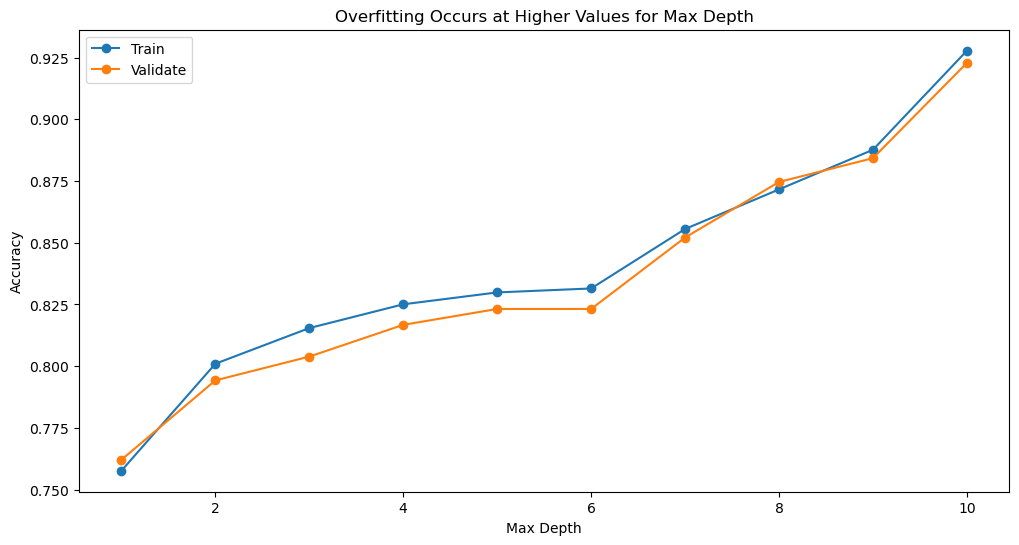

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()